<a href="https://colab.research.google.com/github/https-deeplearning-ai/tensorflow-1-public/blob/master/C3/W3/ungraded_labs/C3_W3_Lab_4_imdb_reviews_with_GRU_LSTM_Conv1D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

You will first import common libraries that will be used throughout the exercise.

In [1]:
#pip install import-ipynb

In [2]:
# import tensorflow_datasets as tfds
import tensorflow as tf
import numpy as np

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import import_ipynb
import pandas as pd
import seaborn as sns
from sklearn import metrics


c:\Users\ihsan\miniconda3\envs\skripsi\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
import preprocessing

importing Jupyter notebook from preprocessing.ipynb


In [4]:
review_data = pd.read_excel('data_scrapping_gabungan.xlsx')
sentences = []
labels = []
for review in review_data['NO OUTLIER & STOPWORD']:
    sentences.append(review)

for label in review_data['Sentimen (Positif 0 - Negatif 1)']:
    labels.append(label)


In [5]:
# Initialize sentences and labels lists
'''
70 : 20 : 10
train : validation : test = 557 : 159 : 80
==========================================
80 : 10 : 10
train : validation : test = 636 : 80 : 80
'''

# 70:20:10
# training_sentences = sentences[80:637]
# training_labels = labels[80:637]

# testing_sentences = sentences[637:]
# testing_labels = labels[637:]

# 80:10:10
# training_sentences = sentences[80:716]
# training_labels = labels[80:716]

# testing_sentences = sentences[716:]
# testing_labels = labels[716:]

# 90:5:5
training_sentences = sentences[40:716]
training_labels = labels[40:716]

testing_sentences = sentences[716:]
testing_labels = labels[716:]

In [6]:
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [7]:
# Parameters
vocab_size = 10000
max_length = 75
trunc_type='post'
oov_tok = "<OOV>"

# Initialize the Tokenizer class
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)

# Generate the word index dictionary for the training sentences
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

# Generate and pad the training sequences
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

# Generate and pad the test sequences
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)

## Plot Utility

Before you define the models, you will define the function below so you can easily visualize the accuracy and loss history after training.

In [8]:
import matplotlib.pyplot as plt

# Plot Utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

## Model 0: ANN

In [9]:
# Parameters
embedding_dim = 32
dense_dim = 128

model_ann = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Set the training parameters
model_ann.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# Print the model summary
model_ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 75, 32)            320000    
                                                                 
 flatten (Flatten)           (None, 2400)              0         
                                                                 
 dense (Dense)               (None, 128)               307328    
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 627,457
Trainable params: 627,457
Non-trainable params: 0
_________________________________________________________________


In [10]:
NUM_EPOCHS = 200
BATCH_SIZE = 128

# Train the model
history_ann = model_ann.fit(padded, training_labels_final, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS, validation_data=(testing_padded, testing_labels_final))

Epoch 1/200
6/6 [==============================] - 7s 256ms/step - loss: 0.6828 - accuracy: 0.5651 - val_loss: 0.6846 - val_accuracy: 0.5625
Epoch 2/200
6/6 [==============================] - 0s 60ms/step - loss: 0.6542 - accuracy: 0.6346 - val_loss: 0.6533 - val_accuracy: 0.6000
Epoch 3/200
6/6 [==============================] - 0s 62ms/step - loss: 0.6332 - accuracy: 0.6317 - val_loss: 0.6128 - val_accuracy: 0.7000
Epoch 4/200
6/6 [==============================] - 0s 48ms/step - loss: 0.5838 - accuracy: 0.7086 - val_loss: 0.5771 - val_accuracy: 0.7250
Epoch 5/200
6/6 [==============================] - 0s 49ms/step - loss: 0.5411 - accuracy: 0.7396 - val_loss: 0.5574 - val_accuracy: 0.7375
Epoch 6/200
6/6 [==============================] - 0s 67ms/step - loss: 0.4868 - accuracy: 0.7751 - val_loss: 0.5090 - val_accuracy: 0.7625
Epoch 7/200
6/6 [==============================] - 0s 55ms/step - loss: 0.4246 - accuracy: 0.8225 - val_loss: 0.4768 - val_accuracy: 0.7875
Epoch 8/200
6/6 [==

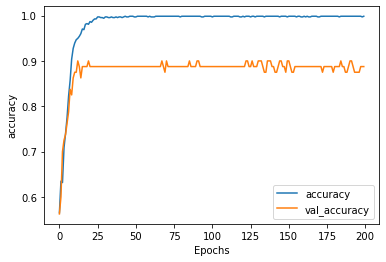

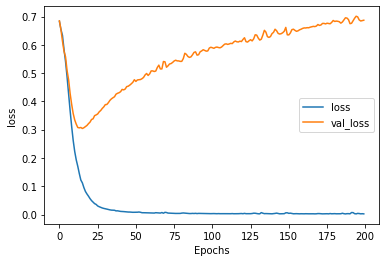

In [11]:
# Plot the accuracy and loss history
plot_graphs(history_ann, 'accuracy')
plot_graphs(history_ann, 'loss')

In [12]:
model_ann.evaluate(x=testing_padded, y=testing_labels_final, verbose=2)

3/3 - 0s - loss: 0.6869 - accuracy: 0.8875 - 147ms/epoch - 49ms/step


[0.686886727809906, 0.887499988079071]

In [13]:
# input_sentence = ['kamar mandi kotor', 'tempat nyaman bersih']
input_sentence = sentences[:40]
# Generate and pad the training sequences
sequences_input = tokenizer.texts_to_sequences(input_sentence)
padded_input = pad_sequences(sequences_input,maxlen=max_length, truncating=trunc_type)

In [14]:
predicted = model_ann.predict(padded_input)
# print(predicted)
rounded = [np.round(x) for x in predicted]

2/2 [==============================] - 1s 15ms/step


In [15]:
label_predicted = []
for i in rounded:
    label_predicted.append(int(i))

In [16]:
actual_labels = labels[:40]

                  precision    recall  f1-score   support

Sentimen Positif       0.82      0.86      0.84        21
Sentimen Negatif       0.83      0.79      0.81        19

        accuracy                           0.82        40
       macro avg       0.83      0.82      0.82        40
    weighted avg       0.83      0.82      0.82        40



<AxesSubplot:>

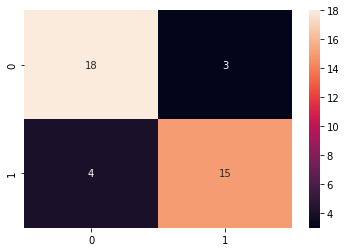

In [17]:
from sklearn.metrics import classification_report,confusion_matrix 
print(classification_report(actual_labels, label_predicted, target_names = ['Sentimen Positif','Sentimen Negatif']))
visualize_cm = metrics.confusion_matrix(actual_labels, label_predicted)
sns.heatmap(visualize_cm, annot=True)